# Agglomerative Clustering

In [33]:
# Read in libraries
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
# Load in data
data = pd.read_csv('../data/sobar-72.csv')

In [3]:
data.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


In [4]:
X = data[data.columns[:-1]]
clustering = AgglomerativeClustering().fit(X)
AgglomerativeClustering()
clustering.labels_

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0])

In [21]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 71 nearest neighbors...
[t-SNE] Indexed 72 samples in 0.005s...
[t-SNE] Computed neighbors for 72 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 72 / 72
[t-SNE] Mean sigma: 11.795238
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.030838
[t-SNE] KL divergence after 300 iterations: 0.800234


/Users/askemeineche/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/askemeineche/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

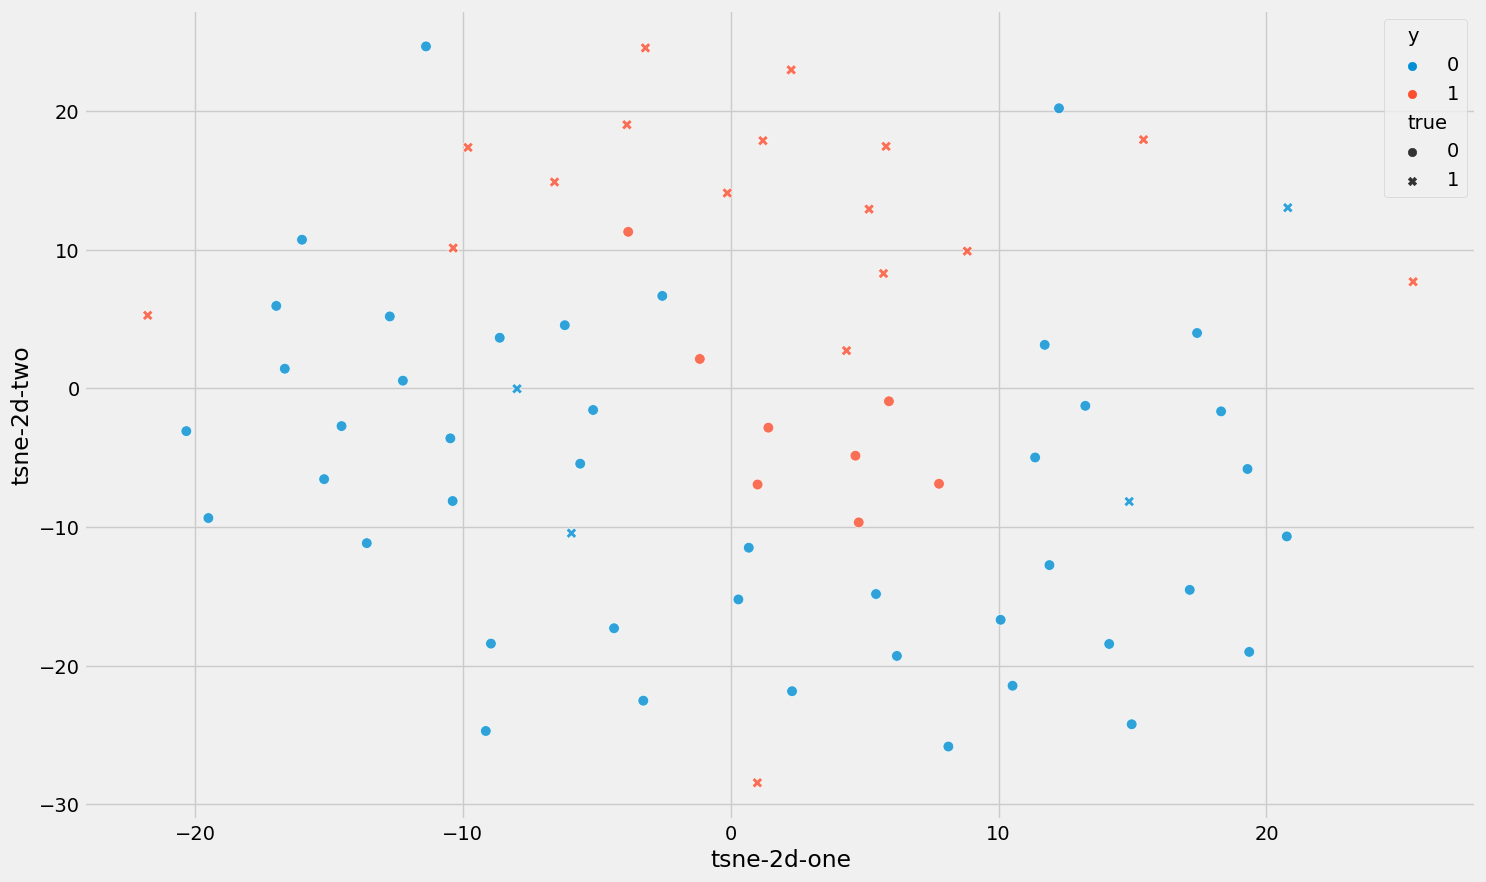

In [32]:
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['y'] = clustering.labels_
df_subset['true'] = data['ca_cervix']

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    style='true',
    hue='y',
    data=df_subset,
    legend="full",
    alpha=0.8, 
    s=60
)

<AxesSubplot: xlabel='pca_dim1', ylabel='pca_dim2'>

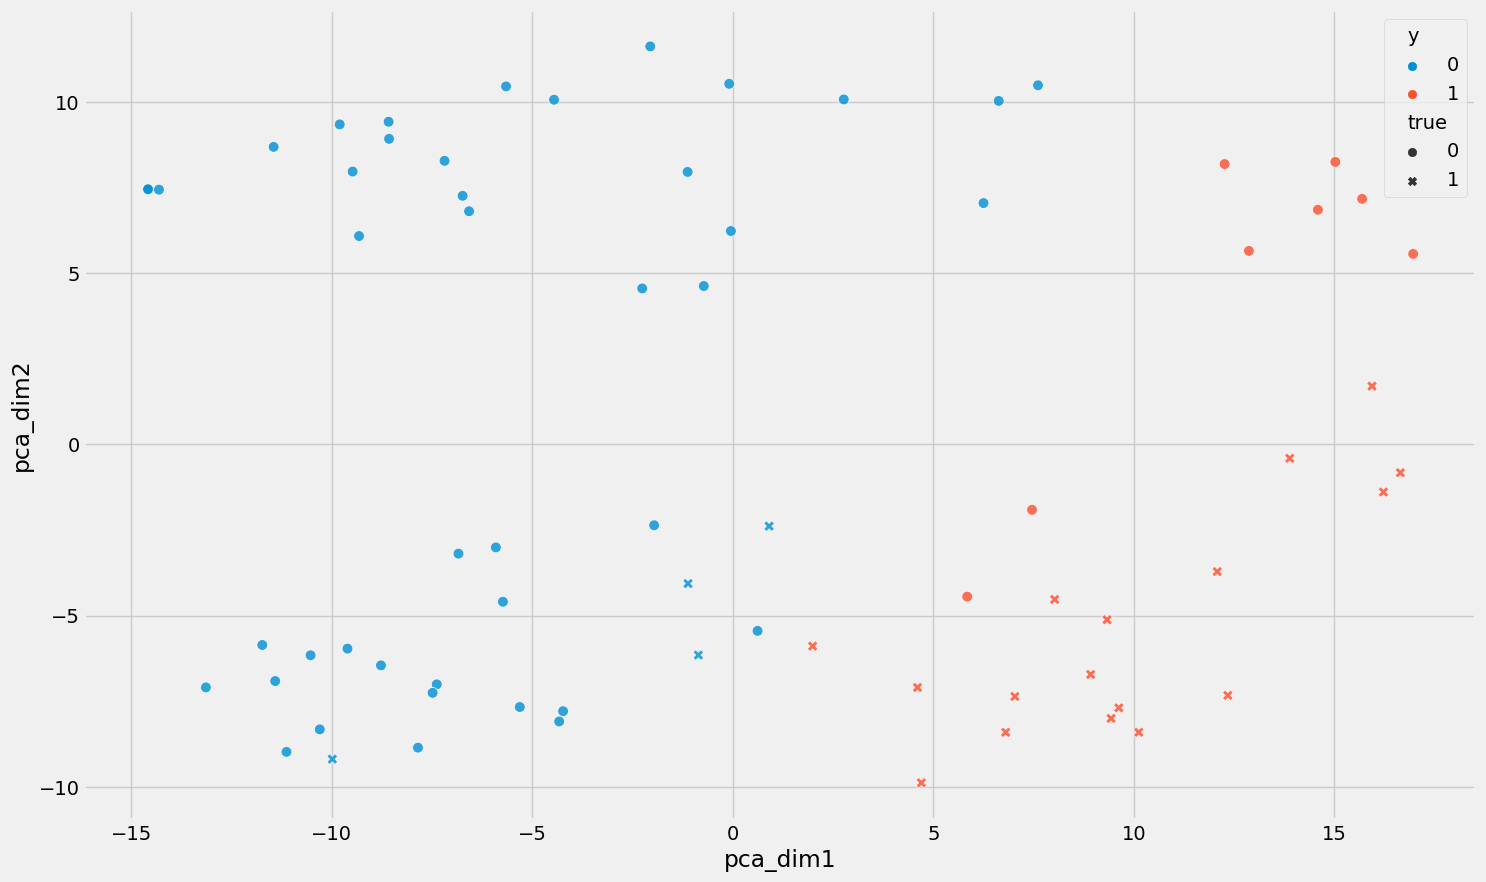

In [48]:
pca = PCA(n_components=2)
PCA_2D = pca.fit_transform(X)
PCA_DF = pd.DataFrame()
PCA_DF['pca_dim1'] = PCA_2D.T[0]
PCA_DF['pca_dim2'] = PCA_2D.T[1]



PCA_DF['y'] = clustering.labels_
PCA_DF['true'] = data['ca_cervix']

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca_dim1", y="pca_dim2",
    style='true',
    hue='y',
    data=PCA_DF,
    legend="full",
    alpha=0.8, 
    s=60
)

In [50]:
def accuracy(df):
    df['correct_classification'] = [row['y']==row['true'] for k,row in df.iterrows()]
    return round(100*df['correct_classification'].sum()/df['correct_classification'].shape[0],2)


In [46]:
print(accuracy(PCA_DF))
print(accuracy(PCA_DF))

(72,)

In [47]:
PCA_DF

,pca_dim1,pca_dim2
0,72,72
